<a href="https://colab.research.google.com/github/DITHAAAA/PYTN_Assignment3/blob/main/PYTN_Assgn_3_Batch_5_Ditha_Tul_Nugraha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

%matplotlib inline

# **Load Data**

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
# Menampilkan data 5 baris pertama
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# Menampilkan data 5 baris terakhir
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
# Menampilkan data secara rinci
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# Menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# Menampilkan jumlah kolom dan baris
df.shape

(45211, 17)

# **Logistic Regression**

In [8]:
pip install scikit-learn

In [9]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Gabungkan transformers untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Buat pipeline dengan preprocessing dan model Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Fit pipeline (termasuk preprocessing dan model Logistic Regression) pada data latih
pipeline.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = pipeline.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Preprocessing: mengubah variabel kategorikal menjadi numerik menggunakan one-hot encoding. Memisahkan dataset menjadi data latih dan data uji.

In [11]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Accuracy: 0.8988167643481145

Confusion Matrix:
 [[7756  196]
 [ 719  372]]

Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.98      0.94      7952
         yes       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



Inisialisasi dan Pelatihan Model: membuat model Logistic Regression, dan melatihnya menggunakan data latih. Prediksi dan Evaluasi Model: menggunakan model untuk memprediksi data uji, dan mengevaluasi performanya menggunakan accuracy, confusion matrix, dan classification report.

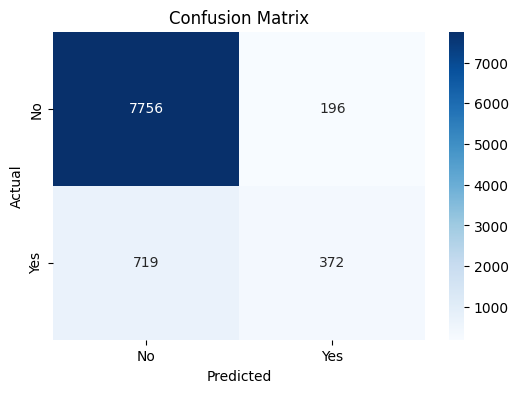

In [12]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Menampilkan visualisasi matriks konfusi menggunakan heatmap.

# **K-Nearest Neighbors**

In [13]:
X = df.drop('previous', axis=1)
y = df['previous']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [14]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

Membuat pipeline dengan langkah-langkah preprocessing dan model K-Nearest Neighbors (KNN) dengan 5 tetangga terdekat.

In [15]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Accuracy: 0.8642043569611855

Confusion Matrix:
 [[7398    0    0 ...    0    0    0]
 [  40  307  154 ...    0    0    0]
 [  32  255   85 ...    0    0    0]
 ...
 [   0    2    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   0    0    1 ...    0    0    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7398
           1       0.35      0.56      0.43       552
           2       0.20      0.20      0.20       426
           3       0.19      0.10      0.13       230
           4       0.06      0.01      0.02       142
           5       0.04      0.01      0.02        97
           6       0.00      0.00      0.00        51
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00        29
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Menghitung akurasi, matriks konfusi, dan laporan klasifikasi untuk mengevaluasi performa model dan menampilkan hasil evaluasi model.

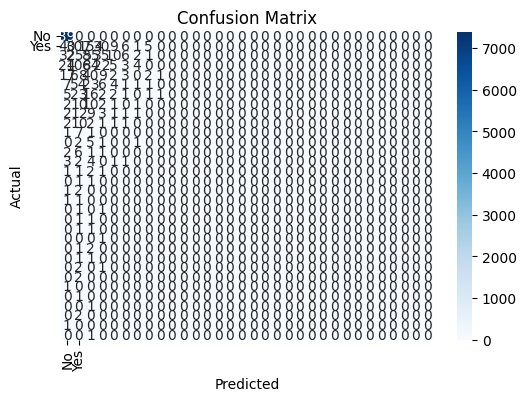

In [16]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Menampilkan visualisasi matriks konfusi menggunakan heatmap.

# **Support Vector Machine**

In [17]:
X = df.drop('pdays', axis=1)
y = df['pdays']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [18]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', C=1.0))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

Membuat pipeline dengan langkah-langkah preprocessing dan model Support Vector Machine (SVM) dengan kernel linear.

In [19]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Accuracy: 0.8266062147517417

Confusion Matrix:
 [[7398    0    0 ...    0    0    0]
 [   0    1    0 ...    0    0    0]
 [   0    0    2 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]

Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00      7398
           1       0.17      1.00      0.29         1
           2       0.14      0.33      0.20         6
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       1.00      0.50      0.67         2
           8       0.33      0.18      0.24        11
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Menghitung akurasi, matriks konfusi, dan laporan klasifikasi untuk mengevaluasi performa model dan menampilkan hasil evaluasi model.

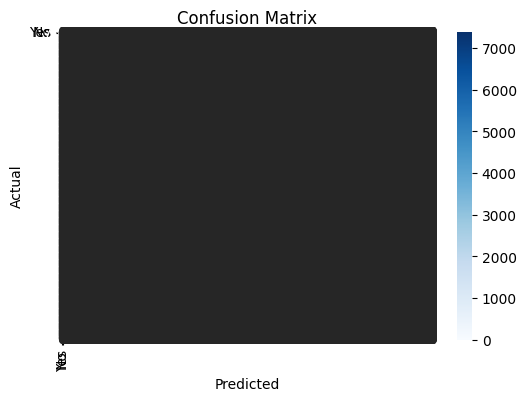

In [20]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Membuat suatu figure dengan ukuran 6x4 inch untuk menampung plot yang akan muncul di output. Menggunakan Seaborn untuk membuat heatmap dari matriks konfusi dengan anotasi nilai di setiap sel. Menampilkan visualisasi matriks konfusi menggunakan heatmap.

# **Decision Tree**

In [21]:
X = df.drop('day', axis=1)
y = df['day']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gabungkan transformers untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

Menggunakan ColumnTransformer untuk menggabungkan dua transformers, yaitu StandardScaler untuk fitur numerik dan OneHotEncoder untuk fitur kategorikal.

In [22]:
# Buat pipeline dengan preprocessing dan model Decision Tree
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit pipeline (termasuk preprocessing dan model Decision Tree) pada data latih
pipeline.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = pipeline.predict(X_test)

Membuat pipeline dengan dua langkah, yaitu preprocessing (preprocessor) dan model (DecisionTreeClassifier). Model yang digunakan adalah Decision Tree dengan menggunakan random_state=42 untuk memastikan reproduktivitas hasil. Melatih model (termasuk preprocessing) pada data latih dan memprediksi target variable menggunakan data uji.

In [73]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Tampilkan hasil
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Accuracy: 0.8907442220502045

Confusion Matrix:
 [[7853   99]
 [ 889  202]]

Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.99      0.94      7952
         yes       0.67      0.19      0.29      1091

    accuracy                           0.89      9043
   macro avg       0.78      0.59      0.62      9043
weighted avg       0.87      0.89      0.86      9043



Menampilkan akurasi, matriks konfusi, dan laporan klasifikasi. Menghasilkan laporan klasifikasi yang mencakup precision, recall, dan f1-score.

# **Random Forest**

In [24]:
X = df.drop('campaign', axis=1)
y = df['campaign']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gabungkan transformers untuk preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

Menggunakan ColumnTransformer untuk menggabungkan dua transformers, yaitu StandardScaler untuk fitur numerik dan OneHotEncoder untuk fitur kategorikal.

In [25]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit pipeline (termasuk preprocessing dan model Random Forest) pada data latih
pipeline.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = pipeline.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Tampilkan hasil
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Accuracy: 0.39997788344575913

Confusion Matrix:
 [[2725  623   80 ...    0    0    0]
 [1543  761   80 ...    0    0    0]
 [ 641  341   58 ...    0    0    0]
 ...
 [   0    1    0 ...    0    0    0]
 [   0    0    1 ...    0    0    0]
 [   0    1    0 ...    0    0    0]]

Classification Report:
               precision    recall  f1-score   support

           1       0.48      0.78      0.59      3484
           2       0.32      0.30      0.31      2501
           3       0.17      0.05      0.08      1114
           4       0.15      0.06      0.08       738
           5       0.15      0.05      0.07       326
           6       0.15      0.04      0.07       283
           7       0.05      0.02      0.02       125
           8       0.03      0.01      0.01       110
           9       0.00      0.00      0.00        65
          10       0.00      0.00      0.00        60
          11       0.00      0.00      0.00        43
          12       0.00      0.00      0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Dalam random forest ini melibatkan preprocessing menggunakan pipeline dan melatih model Random Forest Classifier untuk memprediksi kolom 'campaign'. Evaluasi dilakukan dengan menghitung akurasi, matriks konfusi, dan laporan klasifikasi dan menghasilkan laporan klasifikasi yang mencakup precision, recall, dan f1-score.

# **Naive Bayes**

In [27]:
# Pisahkan data menjadi data latih dan data uji
X = df.drop('balance', axis=1)
y = df['balance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

# Inisialisasi dan latih model Naive Bayes Gaussian
nb_model = GaussianNB()
nb_model.fit(X_train_numeric, y_train)

y_pred = nb_model.predict(X_test_numeric)

Memilih fitur-fitur numerik dari data latih dan data uji. Inisialisasi model Naive Bayes Gaussian dan melatih model pada data latih yang telah diproses, serta memprediksi target variable menggunakan data uji yang telah diproses.

In [29]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Tampilkan hasil
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Accuracy: 0.0013269932544509565

Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
               precision    recall  f1-score   support

       -2712       0.00      0.00      0.00         1
       -2604       0.00      0.00      0.00         1
       -2093       0.00      0.00      0.00         1
       -1944       0.00      0.00      0.00         1
       -1668       0.00      0.00      0.00         1
       -1636       0.00      0.00      0.00         1
       -1621       0.00      0.00      0.00         0
       -1613       0.00      0.00      0.00         1
       -1455       0.00      0.00      0.00         1
       -1400       0.00      0.00      0.00         1
       -1385       0.00      0.00      0.00         1
       -1379       0.00      0.00      0.00         0
       -1336       0.00      0.00      0.00         1
       -1317       0.00      0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Menghitung akurasi, matriks konfusi, dan laporan klasifikasi untuk mengevaluasi performa model dan menampilkan hasil evaluasi model.

# **Confusion Matrix**

Confusion Matrix:
 [[7853   99]
 [ 889  202]]


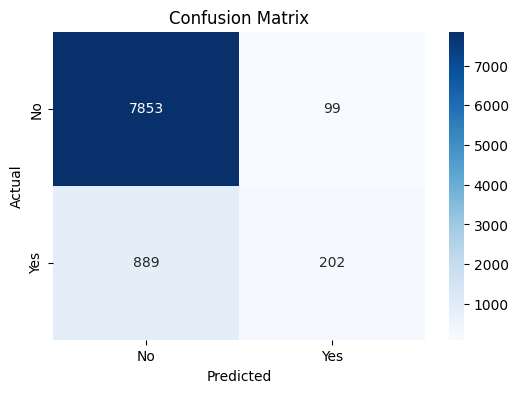

In [71]:
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gabungkan transformers untuk preprocessing
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Buat pipeline dengan preprocessing dan model Support Vector Machine
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', C=1.0))
])

# Fit pipeline (termasuk preprocessing dan model SVM) pada data latih
pipeline.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = pipeline.predict(X_test)

# Buat Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Tampilkan hasil
print('Confusion Matrix:\n', conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Membuat pipeline dengan preprocessing dan model Support Vector Machine (SVM), melatih model SVM pada data latih, memprediksi target variable pada data uji, menghitung confusion matrix menggunakan confusion_matrix dari sklearn dan menampilkan confusion matrix dalam bentuk tabel. Menampilkan visualisasi confusion matrix menggunakan heatmap dengan seaborn dan matplotlib.

# **Visualization**

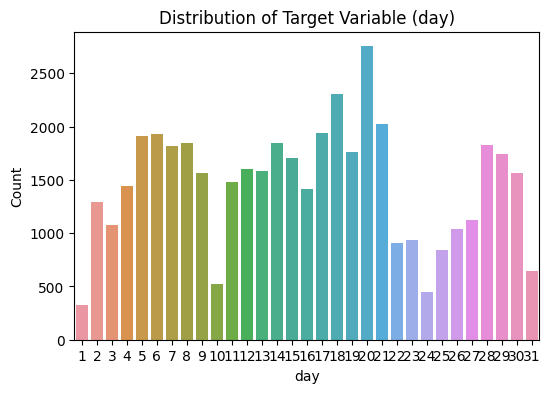

In [74]:
# Visualisasi distribusi kelas target
plt.figure(figsize=(6, 4))
sns.countplot(x='day', data=df)
plt.title('Distribution of Target Variable (day)')
plt.xlabel('day')
plt.ylabel('Count')
plt.show()

Visualisasi distribusi kelas target menggunakan countplot. Menggunakan library Seaborn untuk membuat countplot, yang menghitung dan menampilkan jumlah observasi untuk setiap kategori pada sumbu x ('day'). Visualisasi ini memberikan gambaran tentang sebaran frekuensi setiap kategori pada variabel target ('day').

<ipython-input-75-6b4b523467da>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


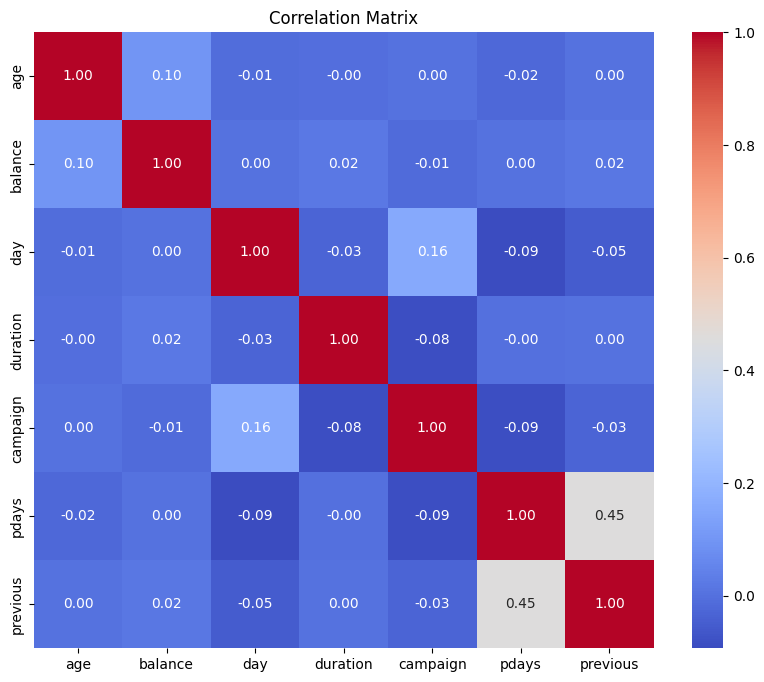

In [75]:
# Visualisasi korelasi antar fitur
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Matriks korelasi mengukur sejauh mana dua variabel bergerak bersama-sama. Nilai korelasi berkisar antara -1 hingga 1, di mana -1 menunjukkan korelasi negatif sempurna, 1 menunjukkan korelasi positif sempurna, dan 0 menunjukkan tidak adanya korelasi.


Matriks korelasi untuk melihat hubungan antar fitur menggunakan heatmap. Visualisasi ini memberikan gambaran mengenai sejauh mana fitur-fitur dalam dataset saling berkorelasi. Warna dan angka di dalam heatmap menggambarkan kekuatan dan arah korelasi antar fitur. Heatmap korelasi sering digunakan untuk membantu pemahaman terhadap hubungan antar variabel dalam analisis data.

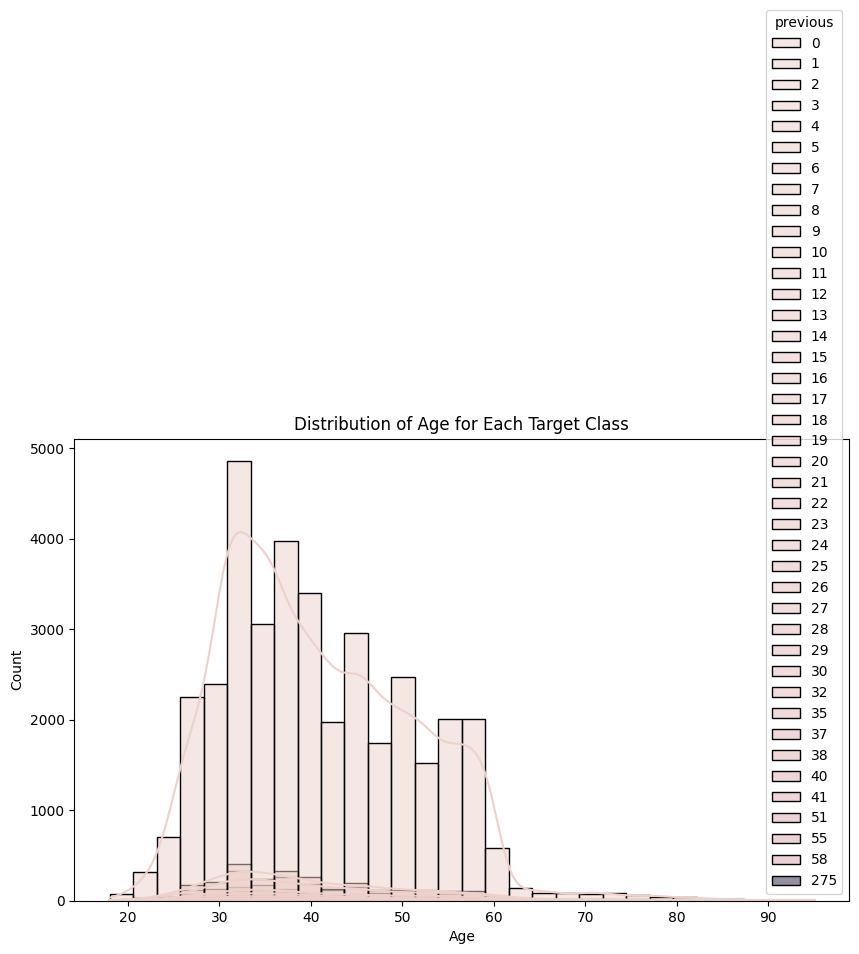

In [76]:
# Visualisasi distribusi umur terhadap kelas target
plt.figure(figsize=(10, 6))
sns.histplot(x='age', hue='previous', data=df, bins=30, kde=True)
plt.title('Distribution of Age for Each Target Class')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Visualisasi distribusi umur terhadap kelas target menggunakan histogram, yang digunakan untuk membuat histogram distribusi umur dengan mempertimbangkan kelas target ('previous') untuk setiap nilai umur ('age'). Visualisasi ini membantu dalam memahami distribusi umur dalam konteks kelas target yang berbeda. Menggunakan library Seaborn untuk membuat histogram plot.

# **Kesimpulan**

*   Cocok untuk masalah klasifikasi biner, interpretasi yang mudah, dapat mengatasi multikolinearitas.
*   Kurang efektif untuk data yang tidak linear, sensitif terhadap outlier.
*   Sederhana, dapat menangani data non-linear, tidak memerlukan asumsi terhadap distribusi data.
*   Sensitif terhadap nilai k, bisa lambat untuk dataset besar, memerlukan scaling fitur.
*   Efektif di ruang fitur berdimensi tinggi, baik untuk dataset dengan margin keputusan yang jelas.
*   Kurang efisien untuk dataset besar, memerlukan preprocessing yang baik, memilih kernel yang tepat penting.
*   Interpretasi yang mudah, tidak memerlukan scaling fitur, dapat menangani data kategorikal.
*   Rentan terhadap overfitting, hasil dapat tidak stabil dengan variasi kecil dalam data.
*   Mengatasi overfitting dengan ensemble, dapat menangani fitur yang tidak penting, stabil dan kuat secara umum.
*   Sulit untuk diinterpretasi, kompleksitas model.
*   Sederhana dan cepat, efektif untuk dataset besar, dapat digunakan untuk klasifikasi dan estimasi probabilitas.
*   Memberikan gambaran tentang kinerja model klasifikasi.
*   Visualisasi dapat membantu memahami distribusi data, korelasi antar fitur, dan hasil model.
*   Heatmap confusion matrix membantu memahami sejauh mana model berhasil atau gagal dalam memprediksi kelas.
*   Evaluasi model melibatkan penggunaan metrik seperti akurasi, presisi, recall, dan F1-score.
*   Asumsi independensi yang kuat, kinerja dapat menurun jika asumsi tidak terpenuhi.
*   Pilihan model tergantung pada karakteristik data dan tujuan analisis.
